# Applied Artificial Intelligence - Lab 3

Luca van Straaten - 18073611

**System information**: 2018 Intel Core i7 13-inch MacBookPro15,2, 16GB RAM, 512GB SSD, macOS Ventura 13.0 (22A380), kernel 22.1.0

This file, along with the rest of the labs, are tracked in a git repository on github. [lab 3](https://github.com/lucanatorvs/Applied_Artificial_Intelligence_Lab/blob/main/3/lab3.ipynb)

In the following two labs, we will apply the CRISP-DM methodology for data mining in a simple form. For this assignment, we will start with the data understanding, followed by data preparation. The overall goal of this and next lab is to build and train a Neural Network that can recognize handwritten digits from 0 to 9. You can use the following code to download the MINIST data of handwritten digits.


In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib as mpl
import matplotlib.pyplot as plt

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

## Exercise 1 - Data understanding

### A

Investigate the shape of the data and

**Question**: explain what you see.

**Answer**: The data is a 3D array with 60000 images of 28x28 pixels. Each pixel is a value between 0 and 255. On the first axis, the 60000 images are stored. On the second axis, the labels are stored. The test data has the same shape, but only 10000 images.


In [2]:
print("X_train_full.shape: ", X_train_full.shape)
print("y_train_full.shape: ", y_train_full.shape)
print("X_test.shape: ", X_test.shape)
print("y_test.shape: ", y_test.shape)

X_train_full.shape:  (60000, 28, 28)
y_train_full.shape:  (60000,)
X_test.shape:  (10000, 28, 28)
y_test.shape:  (10000,)


### B

Check if the labels are skewed by plotting their count distribution per class.

**Question**: explain what you see.

**Answer**: The labels are not skewed. The distribution is almost equal. and aproximately the same between the training and test data.


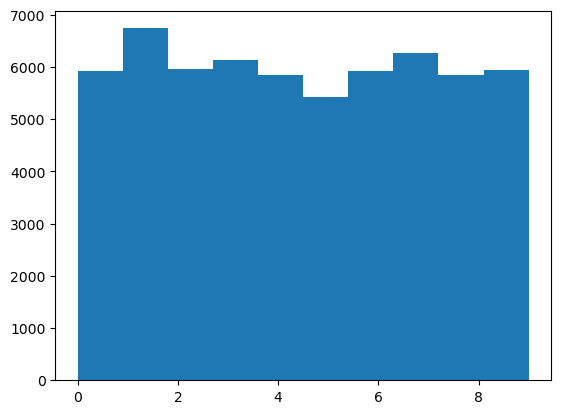

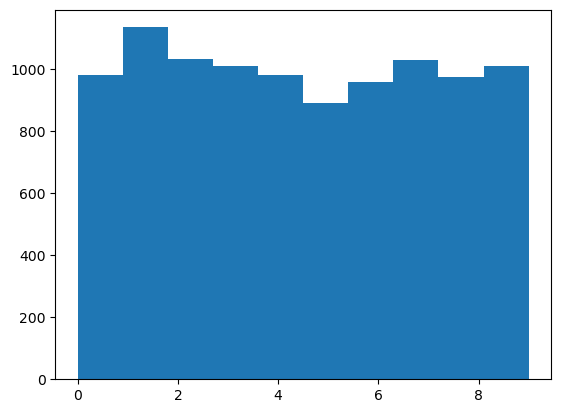

In [3]:
plt.hist(y_train_full, bins=10)
plt.show()

plt.hist(y_test, bins=10)
plt.show()

### C

Select a random image from the training set (for example with the random.randint()
function to select a random index of X_train) and print the resulting array. Calculate the
maximum value and

**Question**: explain the meaning of that value.

**Answer**: 255 is the maximum value for a pixel becoause the pixel values are stored as unsigned 8-bit integers, which can have a value between 0 and 255. 0 is white and 255 is black.


In [4]:
import random

random_index = random.randint(0, len(X_train_full))
print("Label: ", y_train_full[random_index])
print("Max value: ", X_train_full[random_index].max())
print("Index: ", random_index)

Label:  8
Max value:  255
Index:  28710


In [5]:
print(X_train_full[random_index])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0  84 141 175  51   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  28 145
  249 253 254 255 232   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  35 112 213 245 254
  254 254 254 185 132   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  36 219 254 254 254 254
  254 254 254  98   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  36 218 254 254 25

### D

Plot the image using the matplotlib function imshow(). Compare the image to the label and
make sure it is correct

**Answer**: That looks correct. its a ```random number between 0 and 9``` and the label is ```the same random number between 0 and 9```.


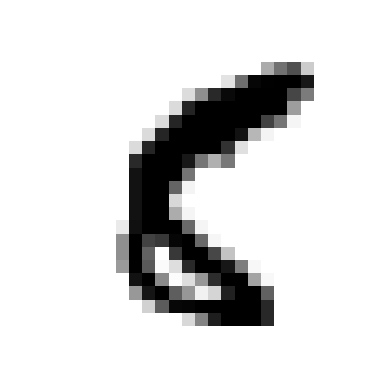

Label:  8


In [6]:
plt.imshow(X_train_full[random_index], cmap="binary")
plt.axis("off")
plt.show()

print("Label: ", y_train_full[random_index])

## Exercise 2 - Data preparation

### A

Separate the training data into training and validation set.

**Question**: Explain why this additional data split is needed.

**Answer**: The validation set is used to test the model during training.


In [7]:
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)
print("X_valid.shape: ", X_valid.shape)
print("y_valid.shape: ", y_valid.shape)

X_train.shape:  (55000, 28, 28)
y_train.shape:  (55000,)
X_valid.shape:  (5000, 28, 28)
y_valid.shape:  (5000,)


### B

Scale the data. In this simple case you can simply divide by the max value for scaling.

X_train.shape:  (55000, 28, 28)
X_valid.shape:  (5000, 28, 28)
X_test.shape:  (10000, 28, 28)


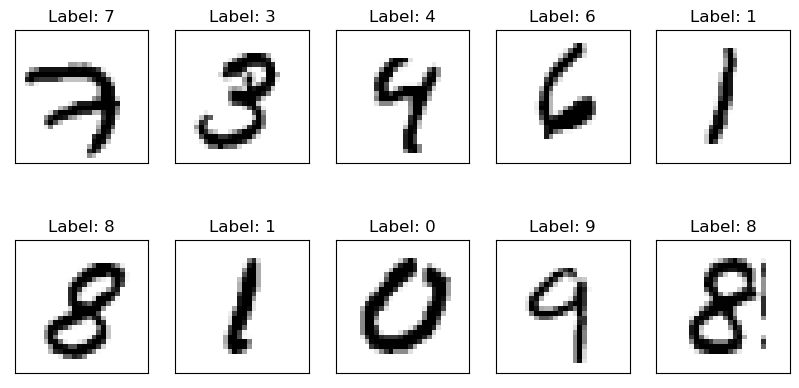

Max value for each image:  [0.99607843 1.         1.         ... 1.         1.         1.        ]


In [8]:
#Scale the data. In this simple case you can simply divide by the max value for scaling
X_test = X_test / 255.0
X_train = X_train / 255.0
X_valid = X_valid / 255.0

print("X_train.shape: ", X_train.shape)
print("X_valid.shape: ", X_valid.shape)
print("X_test.shape: ", X_test.shape)

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i].reshape(28, 28), cmap="binary")
    ax.set(title = f"Label: {y_train[i]}")
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

# print the max value for each image
print("Max value for each image: ", X_train.max(axis=(1, 2)))



### C

Name three different performance measures and explain their meaning and
advantages/disadvantages.

- **Accuracy** is the number of correct predictions divided by the total number of predictions.
  - it is not always the best measure to use, especially if you have an unbalanced classification problem (e.g. if most of your observations belong to one class).
- **Precision** is the number of correct predictions divided by the number of predictions that were made.
  - it is a good measure to use, when the costs of False Positive is high.
- **Recall** is the number of correct predictions divided by the number of correct predictions and the number of false negatives.
  - it is a good measure to ues, when the costs of False Negative is high.
